## text data encoding

In [55]:
#imports
from IPython.display import display, Markdown #just to display markdown

# keras imports
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense

# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

# general imports
import numpy as np  #for vector operation
import string   # provides strings variations for character embedding
import os

In [68]:
display(Markdown("## SAMPLE  TEXTS "))

#creating sample text
samples = ["The cat sat on the mat", " The dog ate my homework"] 
samples

## SAMPLE  TEXTS 

['The cat sat on the mat', ' The dog ate my homework']

In [69]:
display(Markdown("## WORD LEVEL ONE HOT ENCODING "))

#initializing word-encoding dictionary
token_index = {} 

def word_one_hot_embeddings(text_samples,max_sentence_length=8):
    """
        # Creating sentence vectors by represent each word as a vector
        # word as a vector: vector of length of vocabulary, with "1" for that specified word and zero elsewhere
    """

    # Encoding words in the corpus
    print("\nStarting to create token_index for every distinct vocabulary")
    for sample in text_samples:
        for word in sample.split():
            if word not in token_index.keys():
                token_index[word] = len(token_index) + 1
    print("token_index created.\n")

    # Word level one hot encoding
    print("\nStarting to create sentence vector using token_index")
    results = np.zeros(shape=(len(text_samples),len(token_index)+1))
    for i , sample in enumerate(text_samples):
        for j , word in enumerate(sample.split()):
            index_ = token_index[word]
            results[i,index_] = 1
    print("sentences vectorised.\n")
    return (results)

word_level_vectorised_sample = word_one_hot_embeddings(text_samples=samples,max_sentence_length=8)
shape = (word_level_vectorised_sample.shape)



display(Markdown("### created word index's for sentence encoding"))
print (token_index)

display(Markdown("### result"))
print("Output shape {}".format(word_level_vectorised_sample.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(len(samples),shape[0],shape[1]))
print(word_level_vectorised_sample)

print(
"""
Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary
"""
)

## WORD LEVEL ONE HOT ENCODING 


Starting to create token_index for every distinct vocabulary
token_index created.


Starting to create sentence vector using token_index
sentences vectorised.



### created word index's for sentence encoding

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework': 10}


### result

Output shape (2, 11)
# sample:2,  specified max length:2,  # vocabulary:11

[[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.]]

Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary



In [70]:
display(Markdown("## WORD LEVEL ONE HOT ENCODING - keras </font>"))
# One-hot encoding using keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=len (token_index))
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples) # sentence encoding
one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary') # creating one hot results
shape = (one_hot_results.shape)

word_index = tokenizer.word_index
one_hot_results

display(Markdown("### sentence encoding results"))
print (sequences)
display(Markdown("### created word index's for sentence encoding"))
print (word_index)



display(Markdown("### result"))
print("Output shape {}".format(one_hot_results.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(len(samples),shape[0],shape[1]))
print (one_hot_results)

print(
"""
Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary
"""
)

## WORD LEVEL ONE HOT ENCODING - keras </font>

### sentence encoding results

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


### created word index's for sentence encoding

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


### result

Output shape (2, 10)
# sample:2,  specified max length:2,  # vocabulary:10

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]

Note:  In the final result, index of each element in the vectors denotes the eoncoding of the words.
       "0"/"1" denote presence of a vocabulary



In [71]:
display(Markdown("## CHARACTER LEVEL ONE HOT ENCODING "))

def character_one_hot_embeddings(characters,max_sentence_length_in_characters=30):
    """
        # Creating sentence vectors by using character level encoding
    """
    character_index =  dict(zip(characters,(range(1,len(characters)+1))))
    results = np.zeros(shape=(len(samples),max_sentence_length_in_characters,len(characters)+1))

    for i , sample in enumerate(samples):
        #print (sample)
        for j , character in enumerate(sample):
            #print (i,j,character_index.get(character),character)
            results[i,j,character_index.get(character)] = 1
    return (results,character_index)
            
characters = string.printable
char_level_vectorised_sample, character_index = character_one_hot_embeddings(characters)
shape = (char_level_vectorised_sample.shape)

display(Markdown("### characters used for encoding"))
print ("{} distinct character vocab present".format(len(characters)))
print ("Character level indexing")
print(character_index,"\n")


display(Markdown("### result"))
print("Output shape {}".format(char_level_vectorised_sample.shape))
print("# sample:{},  specified max length:{},  # vocabulary:{}\n".format(shape[0],shape[1],shape[2]))
print(char_level_vectorised_sample)

## CHARACTER LEVEL ONE HOT ENCODING 

### characters used for encoding

100 distinct character vocab present
Character level indexing
{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100} 



### result

Output shape (2, 30, 101)
# sample:2,  specified max length:30,  # vocabulary:101

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [72]:
display(Markdown("## word level one hot encoding using hashing"))
dimensionality = len(token_index)
max_length = 10

results = np.zeros((len(samples),dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index= abs(hash(word)% dimensionality)
        results[i, index] =1
        
display(Markdown("### result"))
results

## word level one hot encoding using hashing

### result

array([[1., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [73]:
display(Markdown("## UNDERSTANDING WORD EMBEDDING WITH EMBEDDING LAYER"))
display(Markdown("### imdb dataset preparation"))

# loading the IMDB dataset

# download the dataset from "ai.stanford.edu/~amaas/data/sentiment/" 
# extract the dataset 

imdb_dir = "./aclImdb" # actual path to imdb dataset folder
train_dir = os.path.join(imdb_dir,"train")


# collecting text from each file 
# collecting corresponding text labels
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
         if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

print ("Raw data\n")

print ("Raw text {}\n".format(texts[:2]))
print ("text labels {}\n".format(labels[:2]))

display(Markdown("### creating word embedding on imdb dataset"))


# pre-processing initializations
n_vocab = 10000 # max number of distinct vocabulary (top 10,000)
max_sentence_length = 100  # Cuts a review after 100 words
training_samples = 200 # number of training examples
validation_samples = 10000 # number of validation examples

# pre-processing dataset

# starting to create word emdedding

# building tokenizer (keras object that holds index_to_word dictionary, n_vocab, etc parameters)
tokenizer = Tokenizer(num_words=n_vocab)
tokenizer.fit_on_texts(texts) # feeding the text data to tokenizer

# creating word vectors using keras tokenizer & cutting each sentence after 100 words
sequences = tokenizer.texts_to_sequences(texts) 
sequences_padded = pad_sequences(sequences,maxlen=max_sentence_length,
                                padding='post', truncating='post') # default paddind is "pre" in keras
word_index = tokenizer.word_index # word_to_index mappind dictionary

print ("Found {} unique token.\n".format(len(word_index)) )

# training and testind data split
indices = np.arange(sequences_padded.shape[0])
np.random.shuffle(indices)
sequences_padded = sequences_padded[indices]
labels = np.asarray(labels)[indices]
x_train = sequences_padded[:training_samples]
y_train = labels[:training_samples]
x_val = sequences_padded[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print ("After data preprocessing")
print(" # Training samples {}, # Testing samples {}\n".format(x_train.shape[0],x_val.shape[0]))
print("Word encoded imdb review data")
print(x_train[:2])

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
"""
)

## UNDERSTANDING WORD EMBEDDING WITH EMBEDDING LAYER

### imdb dataset preparation

Raw data

Raw text ["Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.", 'Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did 

### creating word embedding on imdb dataset

Found 88582 unique token.

After data preprocessing
 # Training samples 200, # Testing samples 10000

Word encoded imdb review data
[[  48    3  524   17   10  562  262   10 1050 1549 7381    4   58  110
   146   11  792   94  589  373   69  135    2 2676    8   11   19    6
    84    8  961 1477    2  239  158  121   48   26   13  396   10  232
   391   15   95    1  225  974   10  212  132  119   21 1182   30   16
     1   62    2   42  477   86   22   67  166  131  904   34   25  424
    54  453    8 1852    3   70    2 6508   19   10  437   12    8    1
   704   54  164   14  524   14   11   28   13   97  123  138    3   84
   353   19]
 [  22 3514  591   86   46  123   76   90   11   28  869    5 1770   16
     1  135  790  108   82  180    2   40 5959  122  721    1    7    7
     2  243   22   25    3  609    4  539  153  396   65  115    5   46
   110   80    1   62    1 1332  466    1   17   80   60   20   91  202
    59   27 2271   18  130   42    1  323   12   42   21    3 3

In [62]:
def plot_model_training_history(history):
    
    #collecting all post-training values 
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # ploting losses
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    
    # ploting accuracies
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    return

### building a sequential model using embedding layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 8)            80000     
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6924 - acc: 0.5300 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6678 - acc: 0.8600 - val_loss: 0.6932 - val_acc: 0.5036
Epoch 3/10
200/200 [==============================] - 0s 1ms/step - loss: 0.6502 - acc: 0.

### result

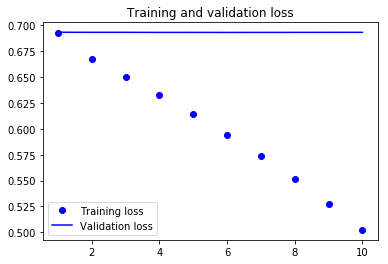

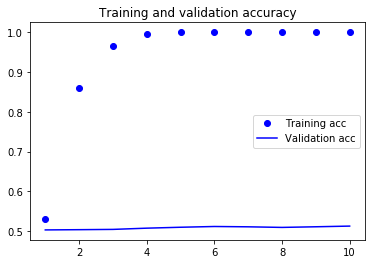

In [63]:
display(Markdown("### building a sequential model using embedding layer"))


# pre-training initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab
size_of_word_vector = 8

## Embedding layer is trainable layer. It is best understood as a dictionary 
## that maps integer indices (which stands for specific words) to a dense vectors

# Creating a 1 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer,size_of_word_vector,input_length=max_sentence_length)) 
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])
model.summary()

# Starting model training
history = model.fit(x_train,y_train,
                   epochs = 10,
                    batch_size = 32,
                    validation_data=(x_val,y_val)
                   )

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

In [74]:
display(Markdown("## USING GLOVE PRE-TRAINED EMBEDDING FOR EMBEDDING MATRIX"))

#loading data from glove embedding to dict
embeddings_index = {}
f = open("./pretrained_embedding_data/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors in pretrained glove embedding.' % len(embeddings_index))

# preparing glove word-embedding matrix
embedding_dim = 100   # word - vector size as taken from glove embedding
word_index = word_index # word_index taken from imdb dataset preparation stage
n_vocab_embedding_layer = n_vocab # max vacabulory size taken from imdb dataset preparation stage
embedding_matrix = np.zeros((n_vocab_embedding_layer, embedding_dim)) # embedding matrix initialization

for word, i in word_index.items(): 
    embedding_vector = embeddings_index.get(word)
    if i < n_vocab_embedding_layer:
        if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector #Words not found in embedding index will be all-zeros.

display(Markdown("### result"))
print("shape of created word-embedding layer : {}\n".format(embedding_matrix.shape))
print("sample representation of encoded words using glove pre-trained embedding")
print(embedding_matrix[2:4])

## USING GLOVE PRE-TRAINED EMBEDDING FOR EMBEDDING MATRIX

Found 400000 word vectors in pretrained glove embedding.


### result

shape of created word-embedding layer : (10000, 100)

sample representation of encoded words using glove pre-trained embedding
[[-0.071953    0.23127     0.023731   -0.50638002  0.33923     0.19589999
  -0.32943001  0.18364    -0.18057001  0.28963     0.20448001 -0.54960001
   0.27399001  0.58327001  0.20468    -0.49228001  0.19973999 -0.070237
  -0.88049001  0.29484999  0.14071    -0.1009      0.99449003  0.36973
   0.44554001  0.28997999 -0.1376     -0.56365001 -0.029365   -0.4122
  -0.25268999  0.63181001 -0.44767001  0.24363001 -0.10813     0.25163999
   0.46967     0.37549999 -0.23613    -0.14128999 -0.44536999 -0.65736997
  -0.042421   -0.28636    -0.28810999  0.063766    0.20281    -0.53542
   0.41306999 -0.59722    -0.38613999  0.19389001 -0.17809001  1.66180003
  -0.011819   -2.3736999   0.058427   -0.26980001  1.2823      0.81924999
  -0.22322001  0.72931999 -0.053211    0.43507001  0.85010999 -0.42934999
   0.92663997  0.39050999  1.05850005 -0.24561    -0.18265    -0.532800

### building a sequential model using glove embeding in embedding layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_12 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 1.3153 - acc: 0.4850 - val_loss: 0.6930 - val_acc: 0.5098
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6437 - a

### result

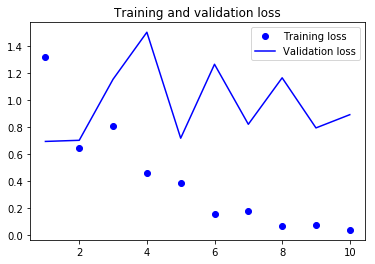

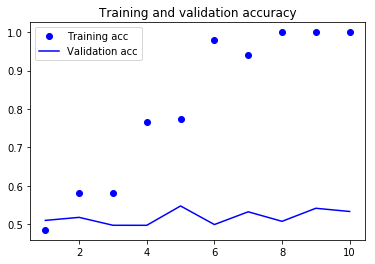

In [65]:
display(Markdown("### building a sequential model using glove embeding in embedding layer"))

# pre-processing initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab # max number vocabulary taken from imdb dataset preparation stage
size_of_word_vector = embedding_dim # taken from  embedding matrix creation stage

# creating a 2 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, size_of_word_vector, input_length=max_sentence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu')) # 1 hidden layer with relu activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

# freezing the weights of embedding layer so that glove embedding are maintained
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# staring model training
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)

## 2 LAYER NEURAL NETWORK, NOW TRAINING EMBEDDING LAYER

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/step - loss: 0.6964 - acc: 0.4800 - val_loss: 0.6934 - val_acc: 0.5077
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5416 - a

### result

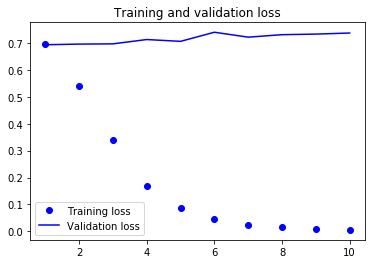

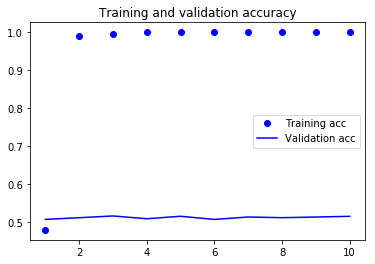

In [75]:
display(Markdown("## 2 LAYER NEURAL NETWORK, NOW TRAINING EMBEDDING LAYER"))

# pre-processing initializations
max_sentence_length = max_sentence_length  # max sentence length taken from imdb dataset preparation stage

#embedding layer initializations
n_vocab_embedding_layer = n_vocab # max number vocabulary taken from imdb dataset preparation stage
size_of_word_vector = embedding_dim # taken from  embedding matrix creation stage


# creating a 2 layer neural network
model = Sequential()
model.add(Embedding(n_vocab_embedding_layer, size_of_word_vector, input_length=max_sentence_length))
model.add(Flatten())
model.add(Dense(32, activation='relu')) # 1 hidden layer with relu activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

## NOTE: No layer freezing

# staring model training
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

# ploting model training results
display(Markdown("### result"))
plot_model_training_history(history)